# EDA, ANÁLISIS EXPLORATORIO

NOTA : este ejercicio está basado en Practical Machine Learning Project in Python on House Prices Data y puedes encontrar la versión completa en:

https://www.hackerearth.com/practice/machine-learning/machine-learning-projects/python-project/tutorial/




En este ejercicio realizaremos un EDA lo más completo posible sobre un set de datos de casas, a partir del cual se intenta predecir el precio del inmueble en  Ames, Iowa, USA.

# Generación de la Hipótesis

¿Qué factores podrían influir en los precios de la vivienda?.


Algunos factores que puedo pensar que influyen directamente en los precios de la vivienda son los siguientes:



*   Área de la casa
*   Cantidad de años tiene la casa
*   Ubicación de la casa
*   ¿Qué tan cerca/lejos está el mercado?
*   Conectividad de la ubicación de la casa con el transporte.
*   Cantidad de pisos tiene la casa
*   ¿Qué material se utiliza en la construcción?
*   Disponibilidad de agua/electricidad
*   Zona de juegos/parques para niños (si los hay)
*   Si tiene terraza
*   Si tiene estacionamiento
*   Si hay guardias


# Exploración de Datos

La exploración de datos es la clave para obtener información de los datos. Los especialistas dicen que una buena estrategia de exploración de datos puede resolver incluso problemas complicados en unas pocas horas. Comencemos.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/Fundamentos-de-Machine-Learning/main/data/train.csv

In [133]:
train = pd.read_csv("train.csv", sep=",")

In [134]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [137]:
print ('Los datos disponibles tienen {0} filas y {1} columnas'.format(train.shape[0],train.shape[1]))
print ('-'*55)

Los datos disponibles tienen 1460 filas y 81 columnas
-------------------------------------------------------


In [138]:
# Otra forma de chequear el set de datos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [139]:
# Revisión de datos faltantes
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [144]:
# ***
# De las 81 características (columnas), 19  tienen valores nulos. Verifiquemos el porcentaje de valores faltantes en estas columnas.
#
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss = pd.DataFrame(miss)
miss.columns = ['% nulos']
miss

,% nulos
Electrical,0.000685
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtFinType1,0.025342
BsmtExposure,0.026027
BsmtFinType2,0.026027
GarageCond,0.055479
GarageQual,0.055479
GarageFinish,0.055479


---
**Observación**

Podemos inferir que la variable PoolQC tiene un 99,5 % de valores faltantes, seguida de MiscFeature, Alley y Fence.

Veamos un gráfico que explique estos valores faltantes usando un gráfico de barras.

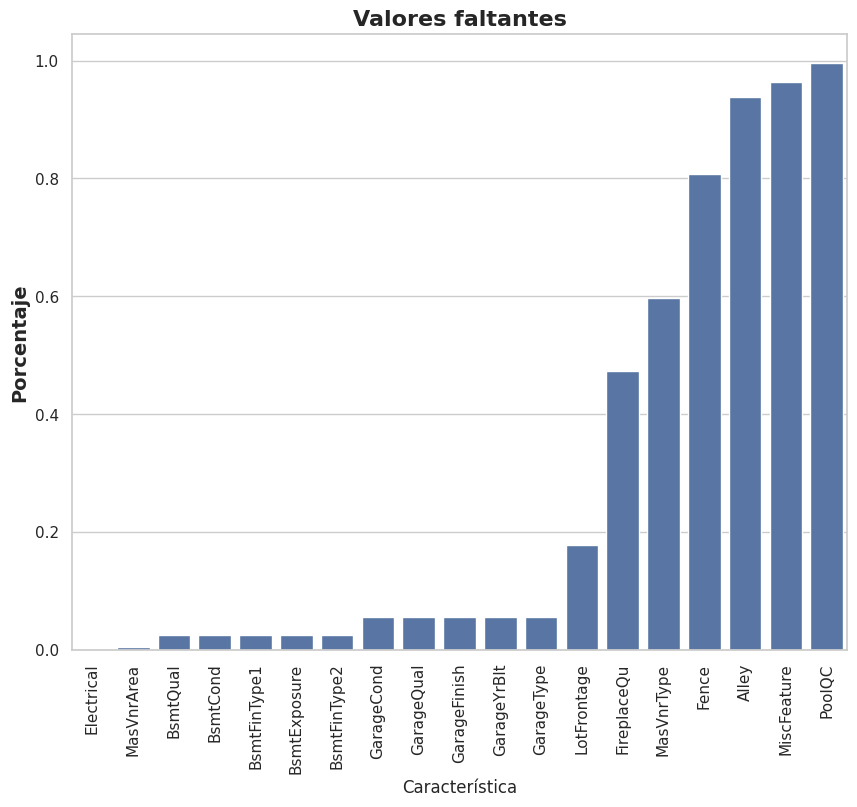

In [145]:
miss_df = miss
miss_df.columns = ['count']
miss_df.index.names = ['Nombre']
miss_df['Característica'] = miss_df.index
#
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Característica', y = 'count', data=miss_df)
plt.xticks(rotation = 90)
plt.title("Valores faltantes", fontsize=16, fontweight="bold")
plt.ylabel("Porcentaje", fontsize=14, fontweight="bold")
plt.show()

## Revisión de distribución de precio de las viviendas

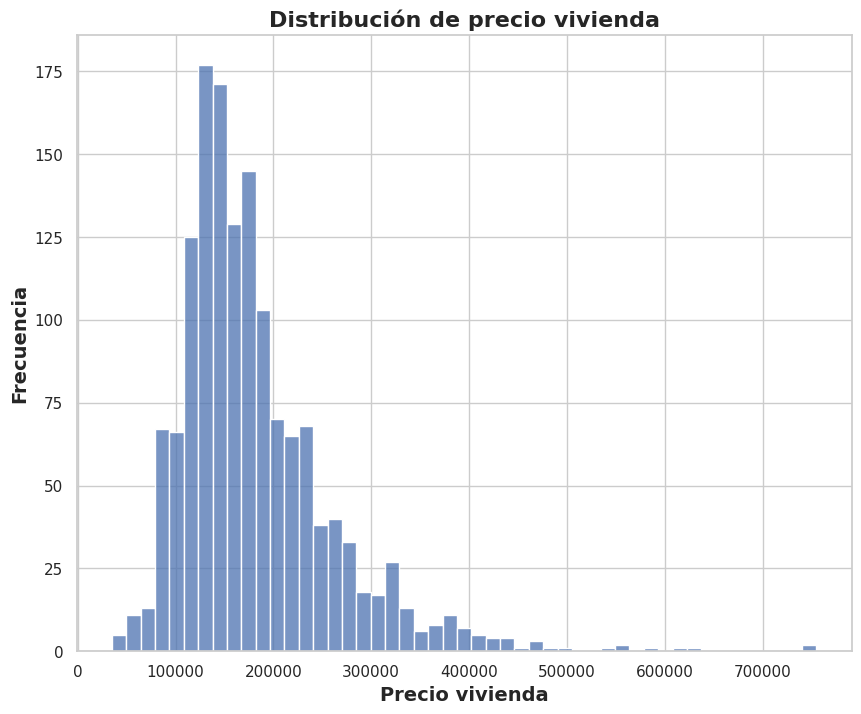

In [146]:
# Gráfica de la distribución
sns.histplot(train['SalePrice'])
plt.title("Distribución de precio vivienda", fontsize=16, fontweight="bold")
plt.xlabel("Precio vivienda", fontsize=14, fontweight="bold")
plt.ylabel("Frecuencia", fontsize=14, fontweight="bold")
plt.show()

---
**Observación**

Vemos que la variable de destino SalePrice tiene una distribución sesgada a la derecha.

Tendremos que registrar la transformación de esta variable para que se distribuya normalmente.

Una variable de destino distribuida normalmente (o casi normal) ayuda a modelar mejor la relación entre las variables de destino y las independientes.

Además, los algoritmos lineales suponen una varianza constante en el término de error.

![](https://machinelearningparatodos.com/wp-content/uploads/2020/10/Relationship_between_mean_and_median_under_different_skewness-1024x386.png)

Veamos como podemos acercarnos más a una distribución normal

Skewness is 0.12133506220520406


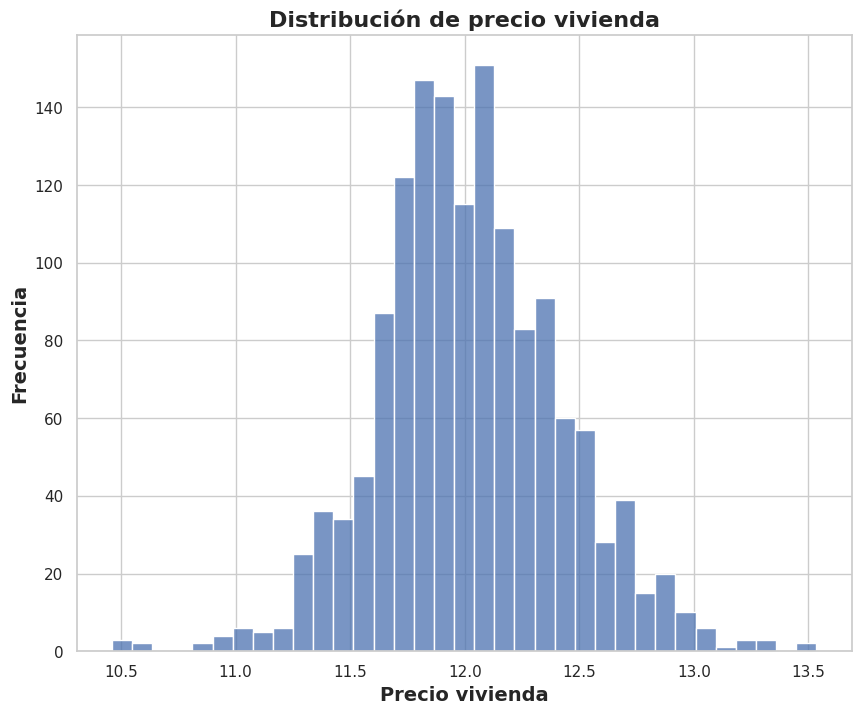

In [147]:
target = np.log(train['SalePrice'])
print ('Skewness is', target.skew())
sns.histplot(target)
plt.title("Distribución de precio vivienda", fontsize=16, fontweight="bold")
plt.xlabel("Precio vivienda", fontsize=14, fontweight="bold")
plt.ylabel("Frecuencia", fontsize=14, fontweight="bold")
plt.show()

---
**OBSERVACIÓN**

Como vio, la transformación logarítmica de la variable de destino nos ha ayudado a corregir su distribución sesgada y la nueva distribución se parece más a la normal.

## Correlación entre variables

Dado que se dispone de 81 variables, visualizar una por una no sería un enfoque astuto.

En su lugar, se revisarán algunas variables en función de su correlación con la variable objetivo.

Se separarán las variables numéricas y categóricas y exploraremos estos datos desde un ángulo diferente.


In [151]:
# Correlación
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("Hay {} columnas numéricas y {} columnas categóricas en los datos de entrenamiento".format(numeric_data.shape[1],cat_data.shape[1]))

Hay 38 columnas numéricas y 43 columnas categóricas en los datos de entrenamiento


In [152]:
# Elimina la columna Id de los datos numéricos
del numeric_data['Id']

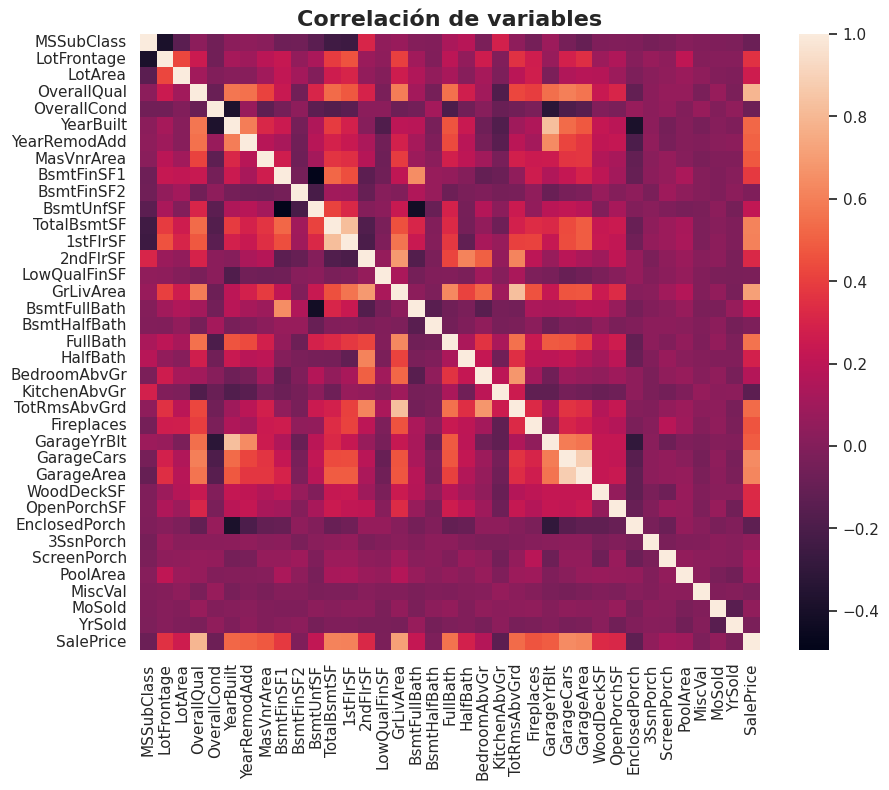

In [153]:
# Ahora veremos la correlación entre las variables numéricas
corr = numeric_data.corr()
sns.heatmap(corr)
plt.title("Correlación de variables", fontsize=16, fontweight="bold")
plt.show()

---
**Observación**

En la última columna de la matriz de correlación, podemos ver la correlación de todas las variables con SalePrice.

Veamos la misma correlación en números

In [154]:
# Valores de la correlación
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #primeros 15 valores
print ('-'*70)
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) # últimos 5 valores

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

----------------------------------------------------------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


---
OBSERVACIONES

+ Aquí vemos que la característica OverallQual (calidad de material) está correlacionada en un 79 % con la variable objetivo (precio de la vivienda)

+ Además, GrLivArea (superficie habitable) está correlacionada en un 70 % con la variable objetivo.  

+ Las siguientes variables muestran que a las personas también les importa si la casa tiene garaje, el área de ese garaje, el tamaño del sótano, entre otras.

+ Este comportamiento es bastante normal.

+ A medida que aumenta la calidad general de una casa, también aumenta su precio de venta.

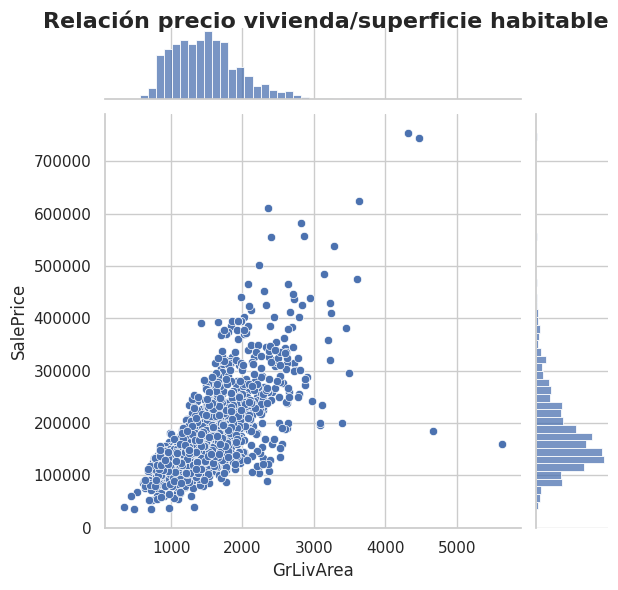

In [155]:
# **
# Visualicemos la siguiente variable correlacionada GrLivArea y comprendamos su comportamiento.
#
grafico = sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'])
# Agregar el título utilizando el método suptitle del objeto de figura
grafico.fig.suptitle("Relación precio vivienda/superficie habitable", fontsize=16, fontweight="bold")

# Ajustar el espacio para que el título no se solape con el gráfico
grafico.fig.subplots_adjust(top=0.95)

plt.show()

---
OBSERVACIONES

+ Como se vio anteriormente, aquí también vemos una correlación directa entre la superficie habitable y el precio de venta.
+ Sin embargo, podemos detectar un valor atípico GrLivArea > 5000.
+ Hemos visto que los valores atípicos desempeñan un papel importante en el deterioro del rendimiento de un modelo.


## Revisión de variables categóricas

Ahora, avanzaremos y exploraremos las características categóricas.

La forma más sencilla de entender las variables categóricas es usando el comando .describe().


In [110]:
# Descripción de las variables categóricas
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Comprobemos el precio de venta medio de una casa en función de su condición de venta.

*SaleCondition* explica la condición de venta.

In [156]:
# Cálculo de la mediana por la condición de la venta
sp_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc="median")
sp_pivot

,SalePrice
SaleCondition,
Abnorml,130000.0
AdjLand,104000.0
Alloca,148145.0
Family,140500.0
Normal,160000.0
Partial,244600.0


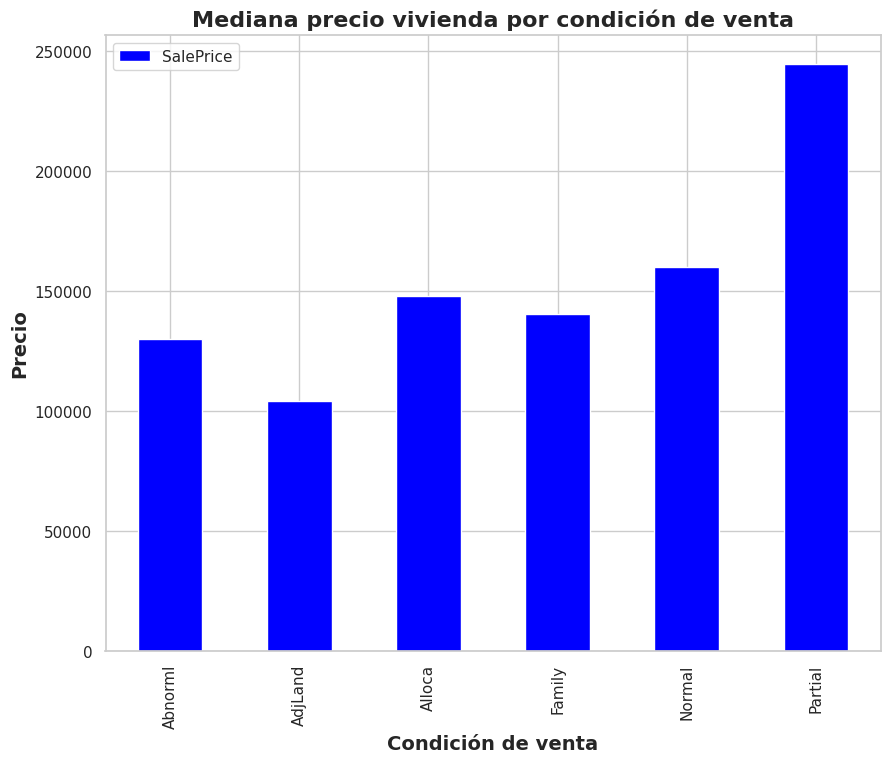

In [157]:
sp_pivot.plot(kind='bar',color='blue')
plt.title("Mediana precio vivienda por condición de venta", fontsize=16, fontweight="bold")
plt.xlabel("Condición de venta", fontsize=14, fontweight="bold")
plt.ylabel("Precio", fontsize=14, fontweight="bold")
plt.show()

Finalmente, para obtener una visión rápida de todas las variables en un conjunto de datos,
 tracemos histogramas para todas las variables numéricas para determinar si todas las variables están sesgadas.


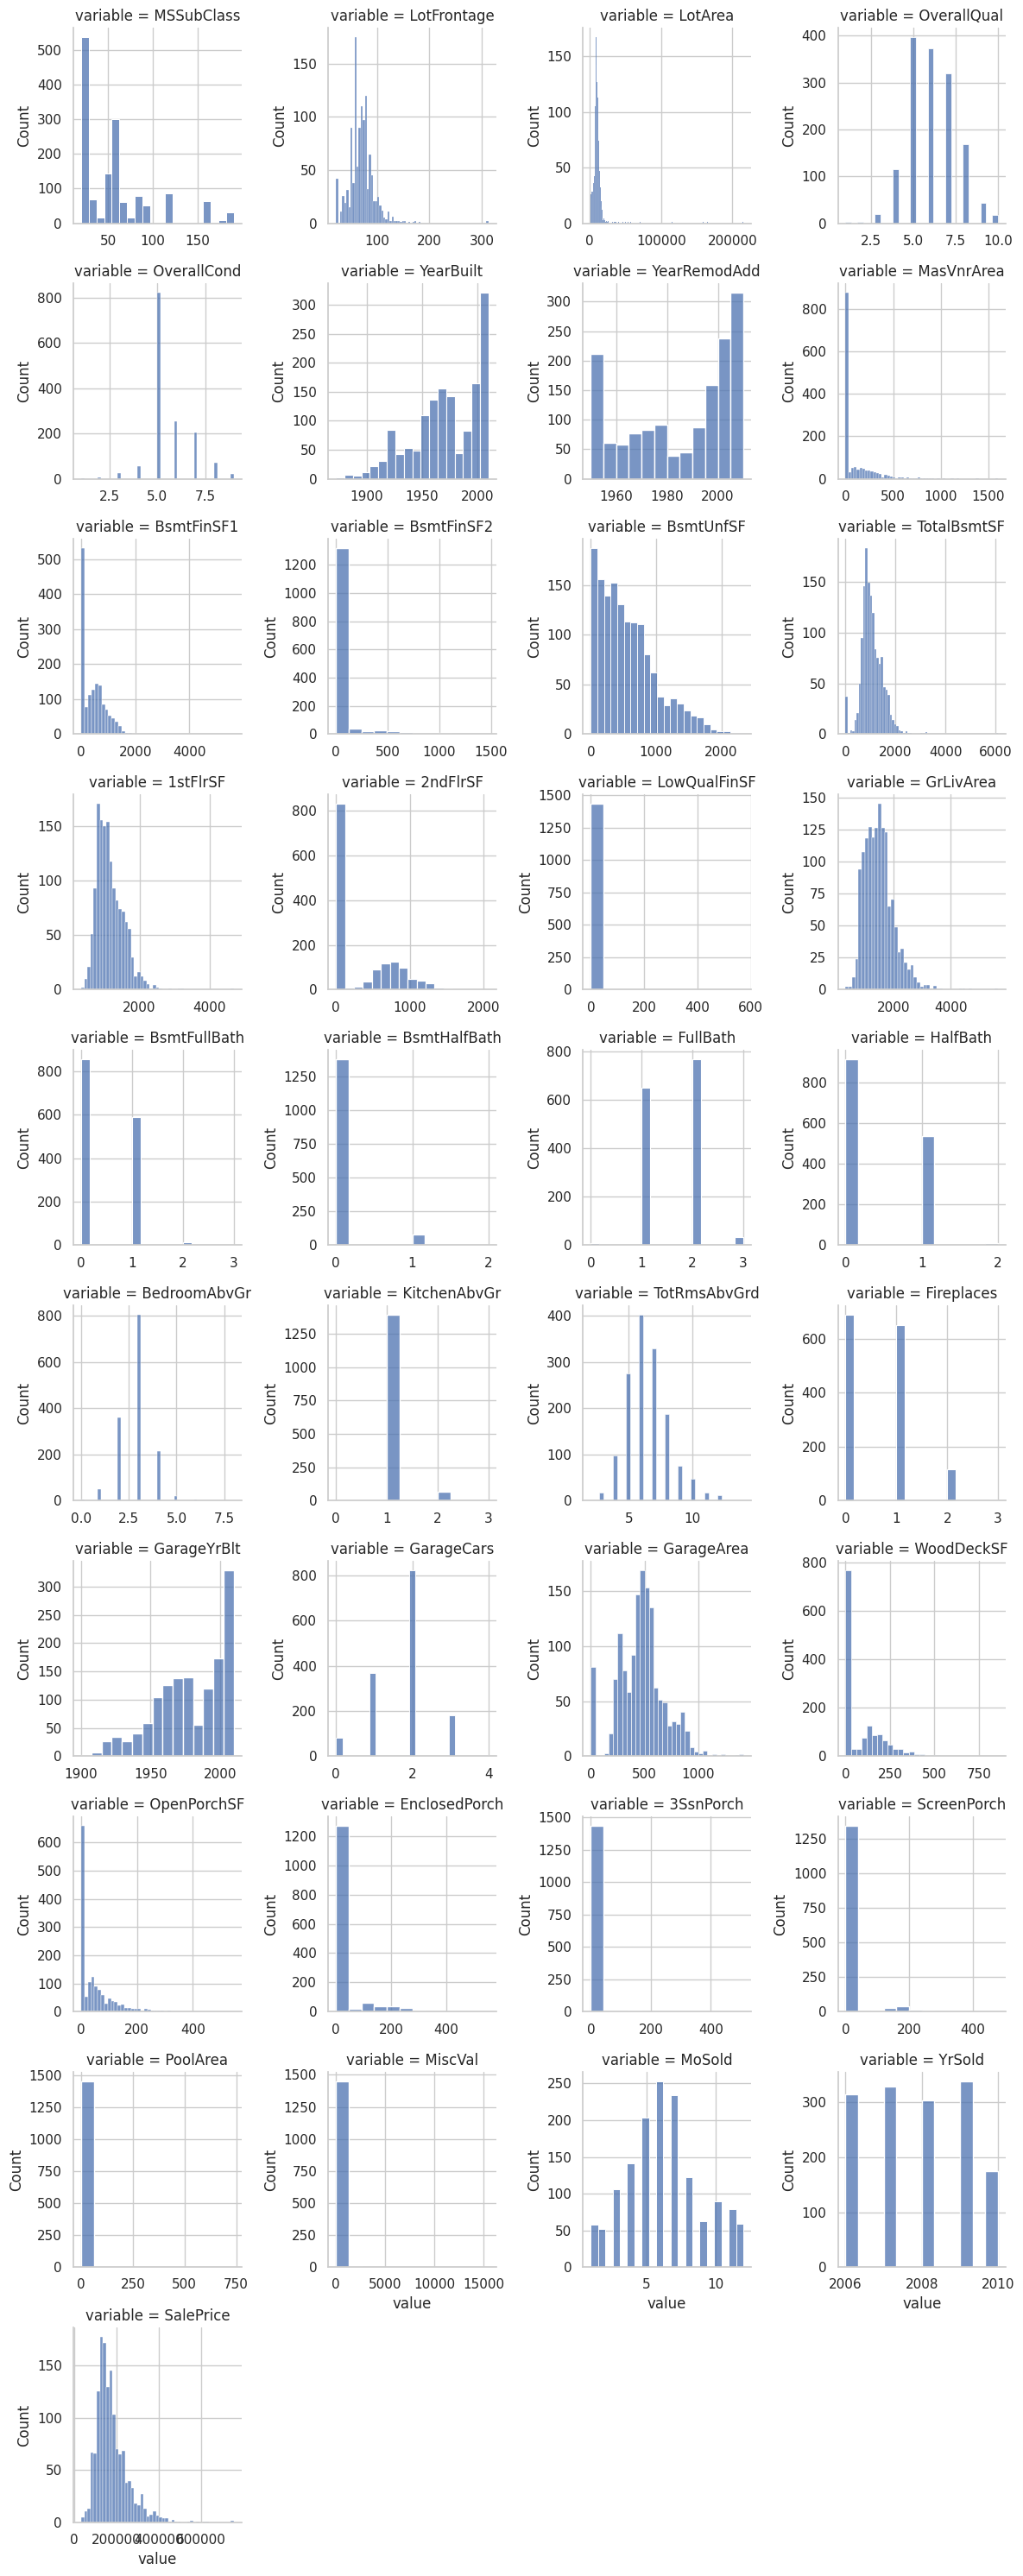

In [158]:
# Histogramas
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.histplot, 'value')
n1

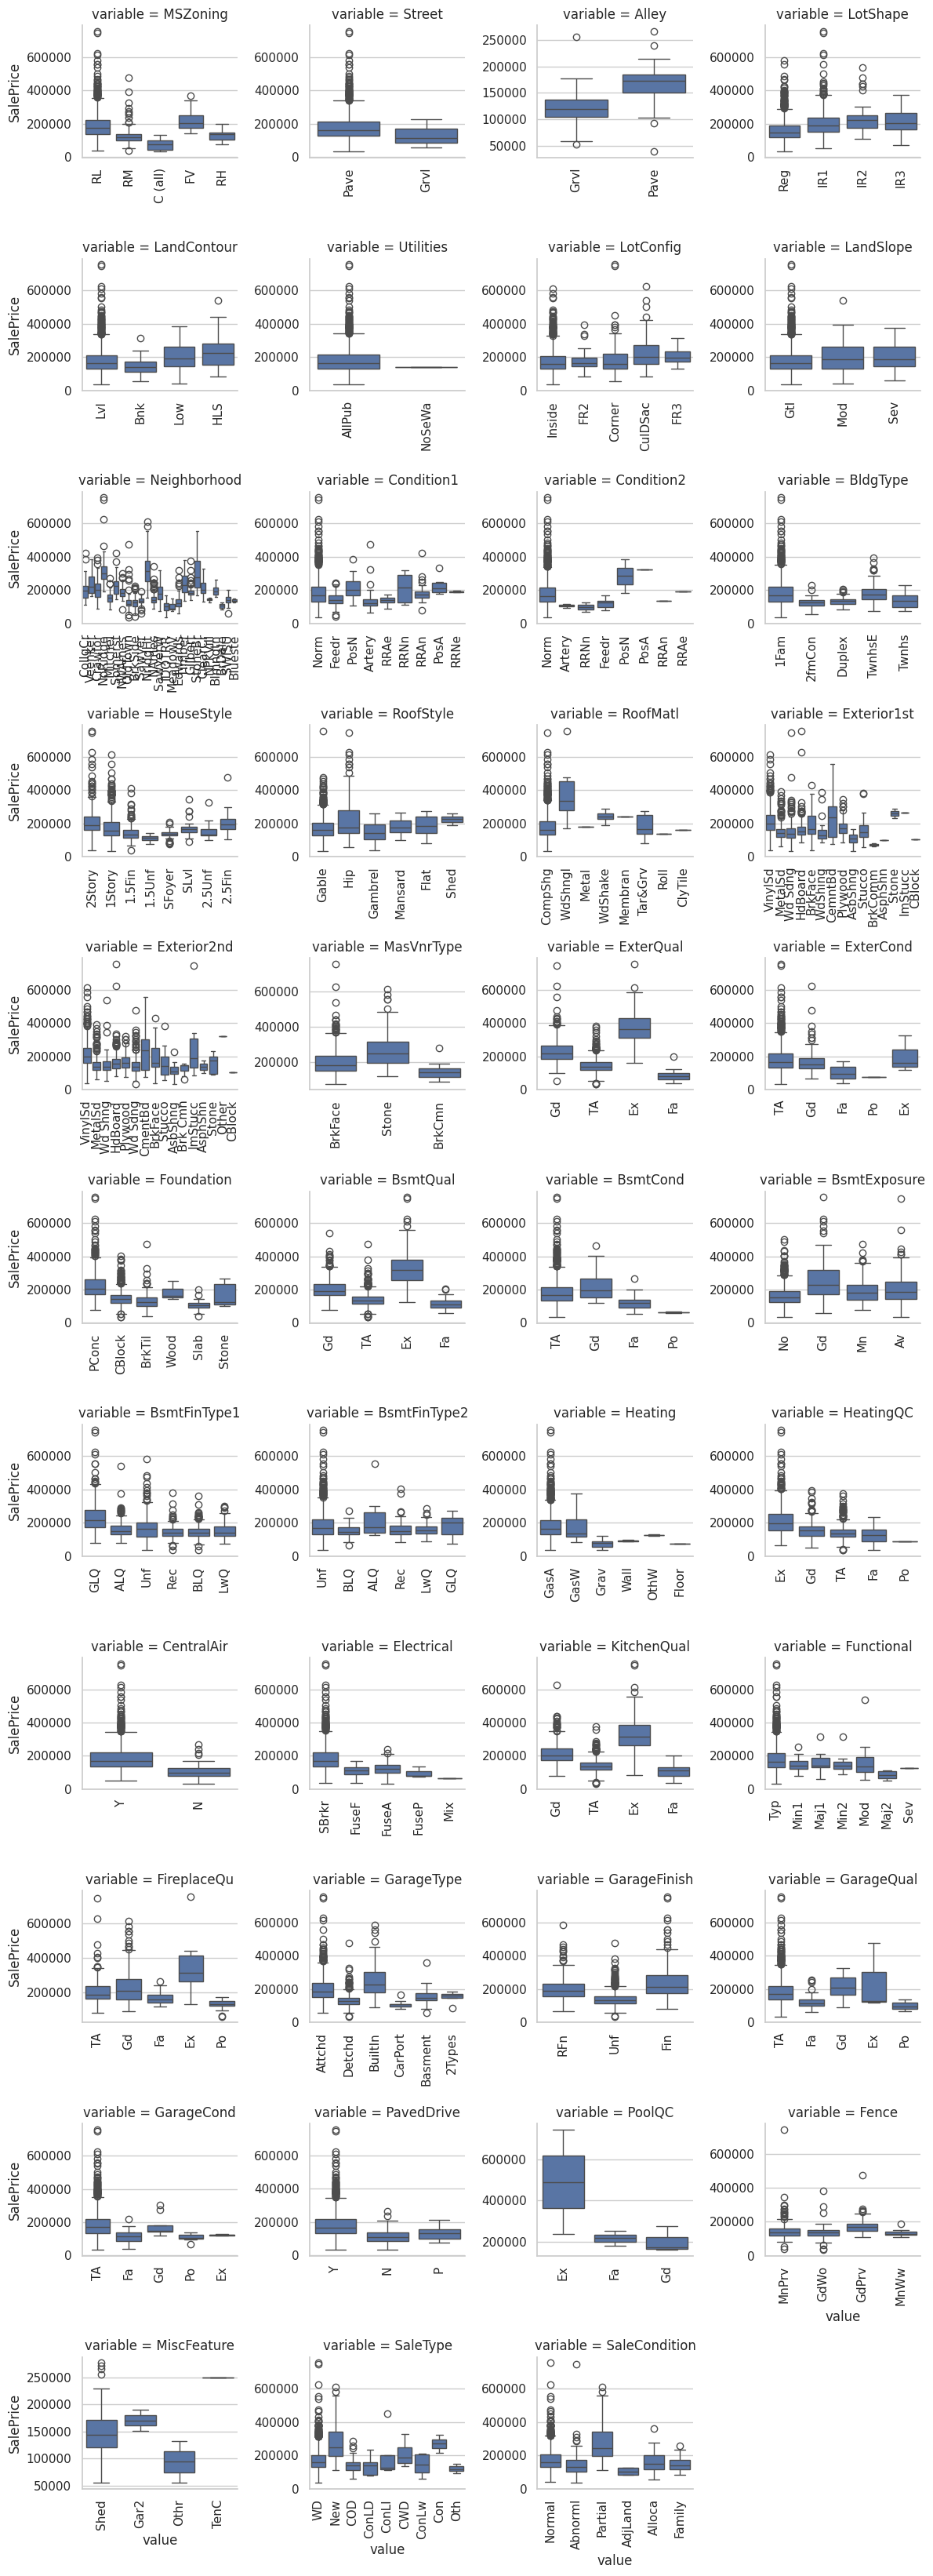

In [160]:
# **
#
# Ahora, creemos diagramas de caja para visualizar variables categóricas.
#
def boxplot(x,y,**kwargs):
  sns.boxplot(x=x,y=y)
  x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(boxplot, 'value','SalePrice')
g;

---
**OBSERVACIONES**

+ Aquí, podemos ver que la mayoría de las variables poseen valores atípicos (ouliers).

+ Nos llevaría días si empezaramos a tratar estos valores atípicos uno por uno.

+ Esto implica, para más adelante, que deberíamos buscar modelos que no se afecten tanto con los outliers.
